# Batch Inference



In [2]:
from pathlib import Path
import random
import matplotlib.pyplot as plt
from IPython.display import display
from PIL import Image
from ultralytics import YOLO

In [3]:
model_path = Path("../models/best_model.pt")
test_dir = Path("../data/processed/images/test")

In [4]:
image_exts = {".jpg", ".jpeg", ".png"}
test_images = sorted(p for p in test_dir.iterdir() if p.suffix.lower() in image_exts)
if not test_images:
    raise FileNotFoundError(f"No test images found in {test_dir.resolve()}")

print(f"{len(test_images)} test images found in {test_dir.resolve()}")

sample_size = 5
rng = random.Random(0)  # reproducible sample
selected = rng.sample(test_images, k=min(sample_size, len(test_images)))

model = YOLO(model_path)
results = model.predict(
    [str(p) for p in selected],
    imgsz=640,
    conf=0.35,
    iou=0.5,
    save=False,
)


738 test images found in /Users/fatimatatanda/Library/CloudStorage/OneDrive-Personal/CLOUD/AI/projects/cv_human_detection/data/processed/images/test

0: 640x640 1 person, 53.6ms
1: 640x640 1 person, 53.6ms
2: 640x640 3 persons, 53.6ms
3: 640x640 2 persons, 53.6ms
4: 640x640 1 person, 53.6ms
Speed: 4.1ms preprocess, 53.6ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


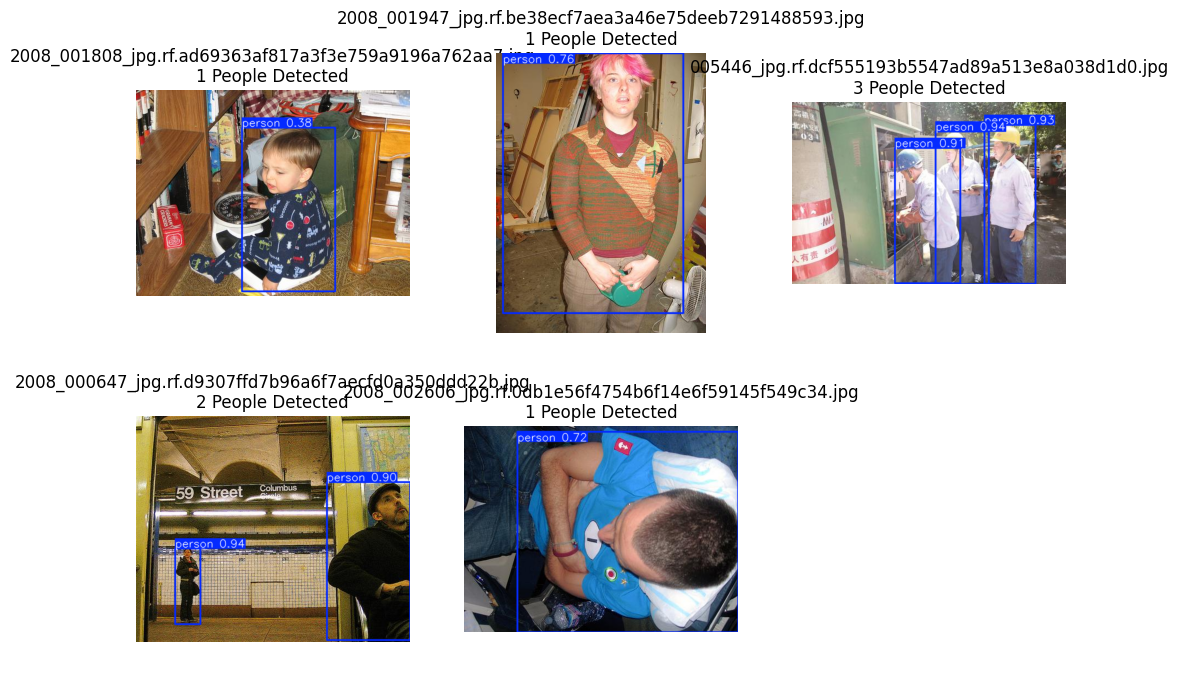

In [8]:
num_imgs = len(results)

cols = 3 if num_imgs > 4 else 2
rows = (num_imgs + cols - 1) // cols

fig, axes = plt.subplots(rows, cols, figsize=(4 * cols, 4 * rows))

# Flatten axes so existing loop still works
axes = axes.flatten()

for ax, img_path, res in zip(axes, selected, results):
    annotated = Image.fromarray(res.plot()[:, :, ::-1])
    ax.imshow(annotated)
    ax.set_title(f"{img_path.name}\n{len(res.boxes)} People Detected")
    ax.axis("off")

# Turn off extra axes
for ax in axes[num_imgs:]:
    ax.axis("off")

plt.show()